# Conan Shing

## Research Interests:

My background is in integrative physiology research where I have been exposed to both the process of data collection and intial exploratory data analysis where descriptive stats, summary tables, and intial data visuilizations are produced. That intial EDA often involves heavy cleaning of our raw data before being imported in R studio for further analysis. My reserch intrests in my academic life revolve around identify sex differences in physiological responses in male and females, so no better comparrison than identifiying how the ratio of male to female medal holders compare across countries. My personal background is high performance sport, a passio I bring into the lab and my everyday life. As such there is no better data set than olympic results. My research questions are listed and summarized below: 

##  Q1: How does the ratio of male to female medal holders vary across countries. 

To answer this question I aim to compare the ammount of male vs female medla holders in various contries and identify if certain countries house predomenatly female or male medal winners. I first plan to use the medal results data, group by country and identify the number male and female medal holders for each country. From there I hope to identify which country containes the most male and most female medal holders. I would like to present this as a % of men and % of female medal holders so I will need to add a column for each country with the % of male and % of female medal holders. I would also like to see how this % changes over time in each country. I would like to present this as a horizontal bar graph showing cummilitive data and then a seperate line graph comparing the top 25 medal winning countires (over the entire time span of the data set) to compare how their ratio of male:female medal holders change.

## Q2: How does the country with the most medal holders at each game change over time and is this title associated with being the host country. 


To answer this question I plan to summarise the total number of medals attained at each game by country and identify the overall winner. From there I hope to compile a new sumarised data set where each country that attended the games have a total number of medals won where I then hope to plot all attendeing countries over time to see how the medal holding leaders change over time. I would also like to see if this has to do with being the host country that year. To do so I plan to compare avg medals won by non host countries attending the games and avg medals won by host countries. Out of intrest I would also like to see if this changes over time. 

For both my research questions some data wrangling will be needed. I most likely will combine the medal and host data sets to answer my second question and utilize the medals data set for my first. 



In [1]:
# setting up packages

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set up visualization 

sns.set_theme(style="whitegrid",
              font_scale=1.3
             )

In [3]:
# loading data sets

df_2022athlete = pd.read_csv("../../data/raw/Beijing_2022_Olympic_Winter_Games/athletes.csv")
df_2022medals = pd.read_csv("../../data/raw/Beijing_2022_Olympic_Winter_Games/medals.csv")
df_hosts = pd.read_csv("../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_hosts.csv")
df_medals = pd.read_csv("../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_medals.csv")
df_results = pd.read_csv("../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_results.csv")

#df_2022athlete.head()
#df_2022medals.head()
#df_hosts.head()
#df_medals.head()
#df_results.head()

## Q1 EDA and Data vis

In [11]:
# Q1 EDA

### creating working df
df = df_medals

### cleaning and wrangling data to prepare to add calculated columns

df['slug_game'] = df['slug_game'].str[-4:]
df = df.rename(columns={'slug_game': 'year'})
df = df.drop(['event_title', 'participant_title', 'athlete_url', 'athlete_full_name', 'country_code', 'country_3_letter_code'], axis = 'columns')

### calculating and creating medal stats 
df['medal_bysex'] = (df.groupby(['medal_type', 'event_gender', 'country_name', 'year'])['medal_type'].transform('count'))
df['medal_total'] = (df.groupby(['medal_type', 'country_name', 'year'])['medal_type'].transform('count'))
df['medal_all'] = (df.groupby(['country_name', 'year'])['medal_type'].transform('count'))
df['medal_%'] = ((df['medal_bysex']/df['medal_total'])*100)
df.sample(10)

### renaming df for future use
medal_bysex = df
medal_bysex
### Sanity check to make sure things are working right
medal_bysex.sample(10)



,discipline_title,year,event_gender,medal_type,participant_type,country_name,medal_bysex,medal_total,medal_all,medal_%
10841,Athletics,2008,Women,SILVER,Athlete,Jamaica,4,4,10,100.000000
8479,Weightlifting,1996,Men,SILVER,Athlete,Germany,9,20,71,45.000000
9058,Gymnastics Artistic,1896,Men,BRONZE,Athlete,Germany,2,2,13,100.000000
4887,Wrestling,1932,Men,BRONZE,Athlete,Finland,13,13,28,100.000000
9500,Fencing,1972,Women,SILVER,GameTeam,Hungary,3,14,36,21.428571
20602,Weightlifting,1948,Men,GOLD,Athlete,United States of America,34,43,98,79.069767
8391,Rowing,2000,Women,BRONZE,Athlete,Germany,9,31,64,29.032258
20427,Athletics,1956,Men,SILVER,Athlete,United States of America,22,29,84,75.862069
9245,Fencing,2016,Men,SILVER,Athlete,Hungary,2,3,16,66.666667
17796,Swimming,1972,Women,BRONZE,Athlete,Soviet Union,7,25,123,28.000000


In [17]:
# method chaining attempt 

df = df_medals

df = (df.drop(['event_title', 'participant_title', 'athlete_url', 'athlete_full_name', 'country_code', 'country_3_letter_code'], axis = 'columns')
      .assign(slug_game=df['slug_game'].str[-4:])
      .rename(columns={'slug_game': 'year'})
      .assign(medal_bysex=.groupby(['medal_type', 'event_gender', 'country_name', 'year'])['medal_type'].transform('count'),
              medal_total=.groupby(['medal_type', 'country_name', 'year'])['medal_type'].transform('count'),
              medal_all=.groupby(['country_name', 'year'])['medal_type'].transform('count'),
              medal_percent=((df['medal_bysex']/df['medal_total'])*100)))

#cant get assign to work

SyntaxError: invalid syntax (4234429630.py, line 8)

<AxesSubplot:title={'center':'Who are the top 10 ever medal winners'}, xlabel='Country Name', ylabel='Number of Medals'>

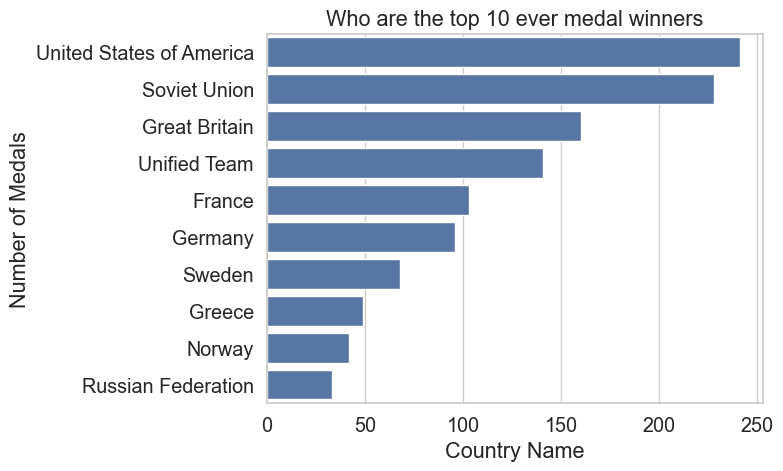

In [12]:
# Q1 Data vis (method chained)

# Who are the top 10 ever medal winners 

df = medal_bysex

df = (df.sort_values(by=['medal_all'], ascending = False).groupby('year').head(10).reset_index()
      .drop(['index'], axis= "columns")
      .groupby('country_name', group_keys=False).apply(lambda x: x.loc[x.medal_all.idxmax()]).sort_values('medal_all',ascending = False).groupby('year').head(10))


plot = sns.barplot(x="medal_all", y="country_name", data=df,
                   label="Total Medals Won", color="b")
plot.set(ylabel ="Number of Medals", xlabel ="Country Name", title = "Who are the top 10 ever medal winners")
plot

# next steps would be to see what portion of these resutls were from males vs females 
# I would like to create a facet grid plot where top 10 medal winners from each games were ploted every year with the
# males vs female contribution was provided

In [ ]:
#### Confirming all the unique years and dates are right. Intrestingly I found several gaps in the years of the games,
#### some of the presumably because of world wars or potentially due to errors in data collection 

#x = df_medals.slug_game.unique().tolist()
#x.sort()
#x

# Q2 EDA and Data vis

In [18]:
# Q2 EDA

### To determine how a host country performs I will need to merge my data frames together

df1 = df_hosts

### preparing df_hosts for merge 
df1 = (df1.drop(['game_slug', 'game_end_date', 'game_start_date', 'game_name'], axis = 'columns')
       .rename(columns={'game_year' : 'year'}))
#df1.dtypes


In [19]:
### preparing df_medals for merge

#the prep and primary wrangling was done above. 
df2 = medal_bysex
df2['year'] = df2['year'].astype(int)
#df2.dtypes

In [20]:
### merging both dataframes together

df_merge = df1.merge(df2, how='inner', on='year')
df_merge

df_merge.sample(10)

### Comments: seems there are some countires that have held several olympics namely the US...this may skew the final
###           results and may be worth looking at it on a game by game basis. This would mean removing the over time clause
###           in my second research question. To be honest I don't think looking at time is all that useful. For example 
###           this would look like 

,game_location,game_season,year,discipline_title,event_gender,medal_type,participant_type,country_name,medal_bysex,medal_total,medal_all,medal_%
7355,Australia,Summer,2000,Badminton,Women,GOLD,GameTeam,People's Republic of China,19,34,70,55.882353
31733,France,Summer,1900,Archery,Men,GOLD,Athlete,France,17,28,103,60.714286
10616,France,Winter,1992,Swimming,Men,SILVER,Athlete,Australia,6,9,30,66.666667
3830,Great Britain,Summer,2012,Athletics,Women,SILVER,Athlete,Jamaica,3,5,12,60.000000
20809,France,Winter,1968,Cycling Track,Men,BRONZE,GameTeam,Italy,7,10,22,70.000000
28415,United States,Winter,1932,Boxing,Men,BRONZE,Athlete,Sweden,8,10,27,80.000000
31756,France,Summer,1900,Croquet,Open,BRONZE,Athlete,France,15,37,103,40.540541
12927,Canada,Winter,1988,Swimming,Women,SILVER,Athlete,German Democratic Republic (Germany),22,48,134,45.833333
4866,China,Summer,2008,Judo,Women,BRONZE,Athlete,Cuba,4,17,30,23.529412
10041,Spain,Summer,1992,Fencing,Men,GOLD,GameTeam,Germany,29,50,122,58.000000


<AxesSubplot:title={'center':'How Many Times Has Each Host Country Hosted a Games'}, xlabel='Number of Times Hosting', ylabel='Country Name'>

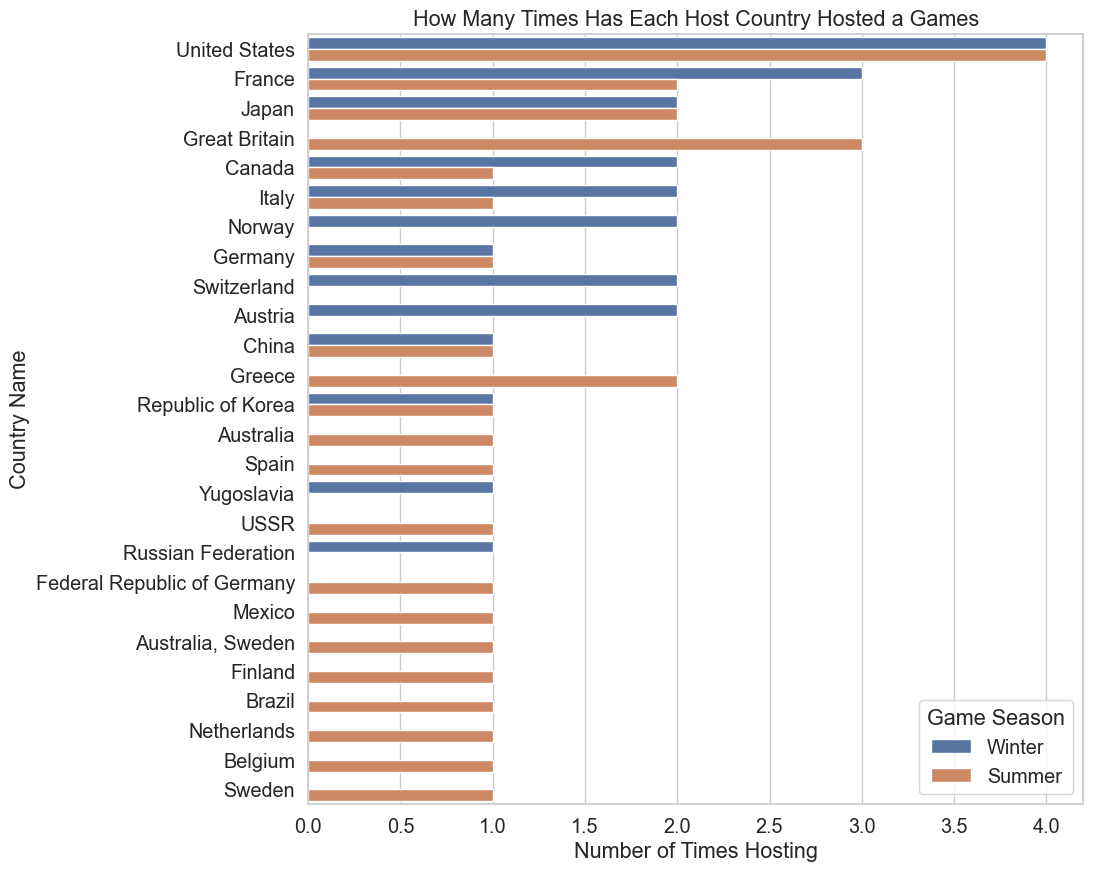

In [21]:
# Q2 Data vis

# which country has hosted the games the most? 
plt.figure(figsize=(10,10))

plot = sns.countplot(df1, y="game_location",
                     order = (df1['game_location'].value_counts().index),
                     hue = 'game_season') 

plot.set(xlabel ="Number of Times Hosting", ylabel ="Country Name", title = "How Many Times Has Each Host Country Hosted a Games")
plt.legend(title='Game Season')

plot



<AxesSubplot:title={'center':'Who are the top 10 ever medal winners'}, xlabel='Country Name', ylabel='Number of Medals'>

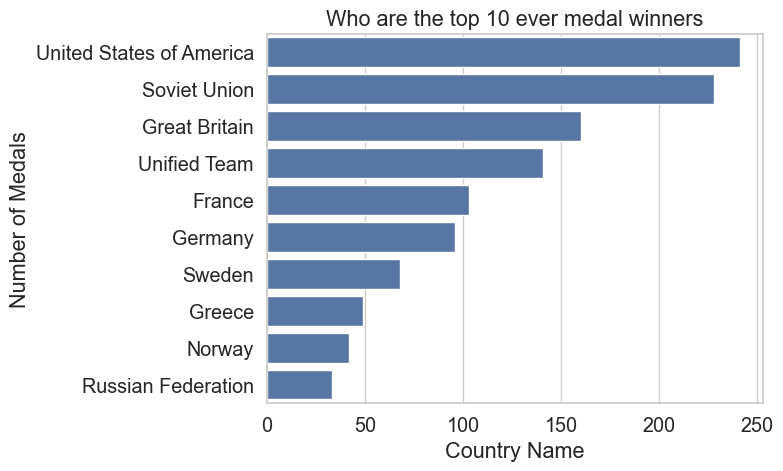

In [22]:
# Q2 Data vis (method chained)

# reshow the most ever won medals, lets compare how the 2 plots differ 

df = medal_bysex

df = (df.sort_values(by=['medal_all'], ascending = False).groupby('year').head(10).reset_index()
      .drop(['index'], axis= "columns")
      .groupby('country_name', group_keys=False).apply(lambda x: x.loc[x.medal_all.idxmax()]).sort_values('medal_all',ascending = False).groupby('year').head(10))


plot = sns.barplot(x="medal_all", y="country_name", data=df,
                   label="Total Medals Won", color="b")
plot.set(ylabel ="Number of Medals", xlabel ="Country Name", title = "Who are the top 10 ever medal winners")
plot


# Q3 EDA and Data vis

In [23]:
# Q3: Which sport is most female and male dominated and does this differ by country? 

#### as it would be next to impossible to find datasets spanning back to the 1890s with accurate lists of athletes that were
#### sent to each games I have chosen the 2022 olympics as it was recent and relevant to conduct my analysis

#### combining 2022 athlete and medal data sets to add a sex column to the medals 

df1 = df_2022athlete.drop(['short_name', 'birth_date', 'country', 'birth_place', 'birth_country', 'country_code', 'discipline', 'discipline_code', 'residence_place', 'residence_country', 'height_m/ft', 'url'], axis= "columns")
#df1

df2 = df_2022medals
df2 = (df2[['medal_type', 'athlete_name', 'country', 'discipline']]
       .rename(columns={'athlete_name' : 'name'}))
#df2

df_merged = df1.merge(df2, how='inner', on='name')
df_merged

#### df_merged was prepared out of curiosoity not sure if I will use it

,name,gender,medal_type,country,discipline
0,AALTONEN Miro,Male,Gold,Finland,Ice Hockey
1,ABRAMENKO Oleksandr,Male,Silver,Ukraine,Freestyle Skiing
2,AICHER Emma,Female,Silver,Germany,Alpine Skiing
3,ALDOSHKIN Daniil,Male,Silver,ROC,Speed Skating
4,ALTHAUS Katharina,Female,Silver,Germany,Ski Jumping
...,...,...,...,...,...
690,ZHANG Yuting,Female,Gold,People's Republic of China,Short Track Speed Skating
691,ZHANG Yuting,Female,Bronze,People's Republic of China,Short Track Speed Skating
692,ZHOU Vincent,Male,Silver,United States of America,Figure Skating
693,ZUMWINKLE Grace,Female,Silver,United States of America,Ice Hockey


In [25]:
# Q3 EDA

### adding calculated columns to dataframes to detemrine how many male and female atheltes each country sent to the 2022 olympics
df = df_2022athlete
df = df.drop(['short_name', 'birth_date', 'birth_place', 'birth_country', 'country_code', 'discipline', 'discipline_code', 'residence_place', 'residence_country', 'height_m/ft', 'url'], axis= "columns")
df['athlete_index'] = 1
df['athletes_sent'] = (df.groupby(['country', 'gender'])['athlete_index'].transform('count'))
df['athletes_total'] = (df.groupby(['country'])['athlete_index'].transform('count'))
df['athlete_%'] = ((df['athletes_sent']/df['athletes_total'])*100)
df = df.replace(['M','F'],['Male', 'Female'])
df.sample(10)

,name,gender,country,athlete_index,athletes_sent,athletes_total,athlete_%
2340,SLOKAR Andreja,Female,Slovenia,1,21,44,47.727273
833,GRITSYUK Arseni,Male,ROC,1,108,217,49.769585
762,GERKEN SCHOFIELD Makayla,Female,Great Britain,1,22,49,44.897959
2646,VIERELA Severi,Male,Finland,1,51,96,53.125000
2091,RAZZOLI Giuliano,Male,Italy,1,72,119,60.504202
2287,SHIGA Akane,Female,Japan,1,72,121,59.504132
117,BARCLAY Ben,Male,New Zealand,1,9,15,60.000000
2568,TSVETKOV Maxim,Male,ROC,1,108,217,49.769585
349,CHARVATOVA Lucie,Female,Czech Republic,1,56,115,48.695652
2752,WILKINSON Alix,Female,United States of America,1,107,225,47.555556


In [ ]:
# method chaining attempt

df = df_2022athlete

df = (df.drop(['short_name', 'birth_date', 'birth_place', 'birth_country', 'country_code', 'discipline', 'discipline_code', 'residence_place', 'residence_country', 'height_m/ft', 'url'], axis= "columns")
      .assign(athlete_index = 1,
              athletes_sent = (.groupby(['country', 'gender'], as_index=False)['athlete_index'].transform('count'))
              athletes_total = (.groupby(['country'], as_index=False)['athlete_index'].transform('count'))
              athlete_% = ((df['athletes_sent']/df['athletes_total'])*100))
      .replace(['M','F'],['Male', 'Female']))

df.sample(10)

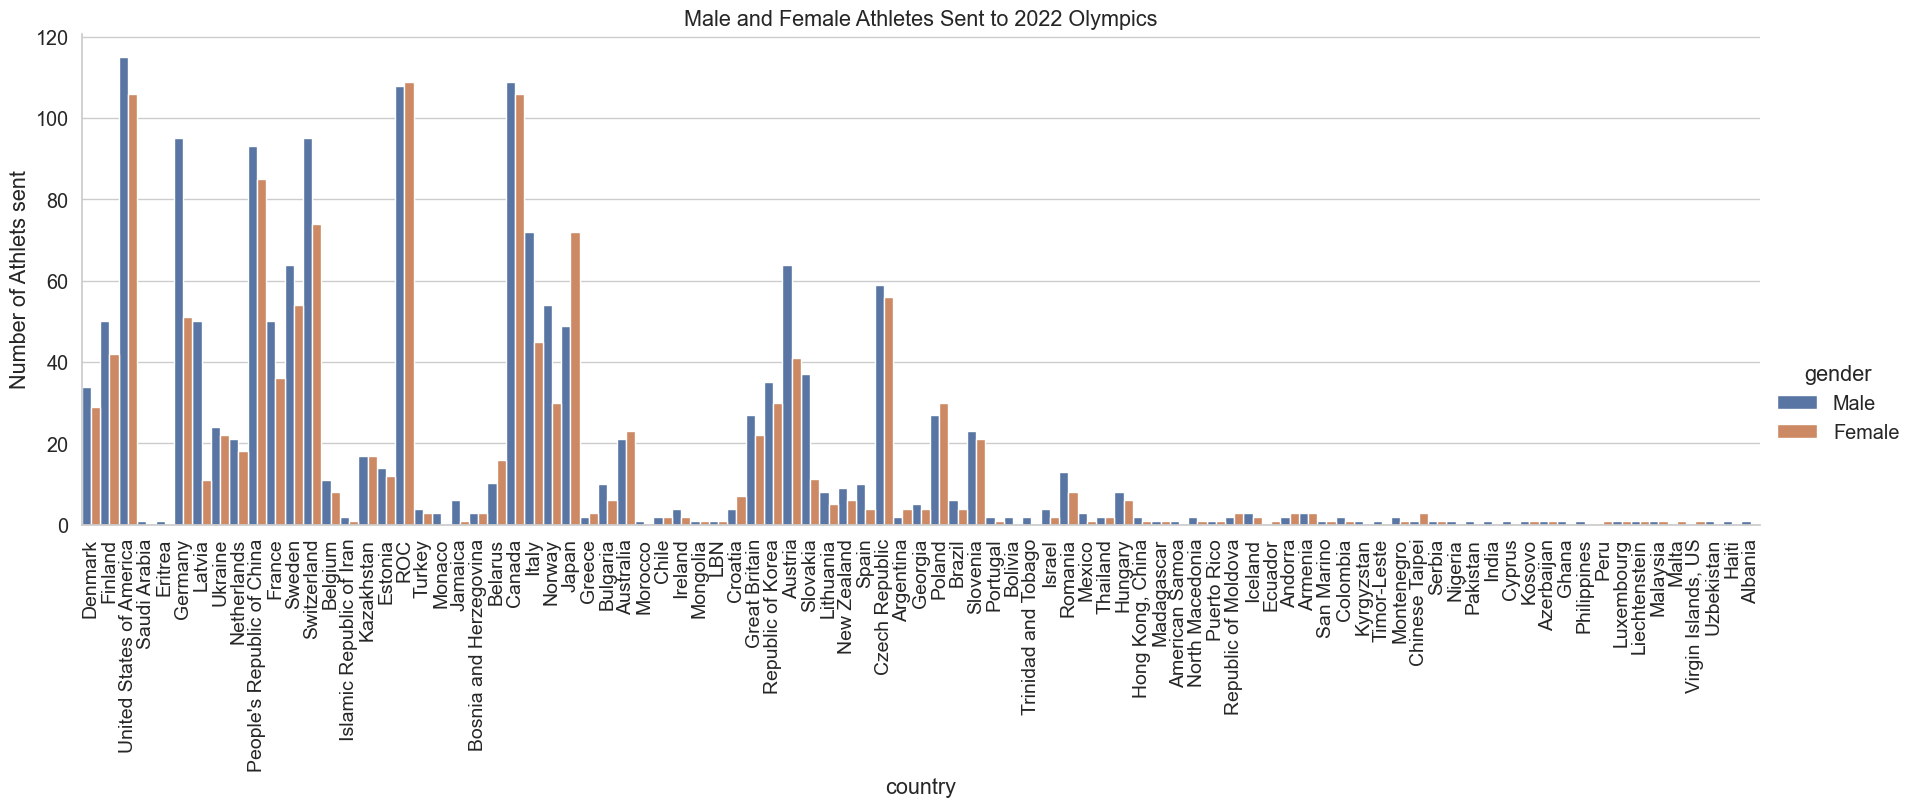

In [26]:
# Q3 Data vis 
plot = sns.catplot(data=df, kind="bar",
                   x="country", y="athletes_sent",
                   errorbar=None,
                   width=1,
                   hue="gender",
                   height=6, aspect=3)

plot.set_xticklabels(rotation=90)
plot.set(ylabel ="Number of Athlets sent", title = "Male and Female Athletes Sent to 2022 Olympics")
plt.xticks(fontsize=14)

plot

### It semmes that most countreis send more males than females to the 2022 games, my next step I would like to take is to
### to compare the top 10 medal winners at the 2022 games and see what % of thoose medals were won by males and females
### I think a good plot to use could be a stacked bar blot...

## Analysis Plan 

This inital EDA took about about 5ish hours of workin. I am fortunate to have lots of experaince wrangling and cleaning data in R and I found it helpful to draft out my analysis and EDA plan in R before converting it to python (a language I am new to). My primary research questions are sill valid and I think I can produce some very meaningful plots to show off my answer. 

My first question asks "How does the ratio of male to female medal holders vary across countries?". Currently I have shown the top 10 highest medal counts ever and my next step would be to create a facet wraped plot where each year I show the top 10 medal count winners from that games and show what % of it came from males or females. To get some qunatitative data I would like to manipulate (max, mins, means, IQRs) the data frame to see what the highest female % is  as well as see the average % contribution. 

My next question asks "How does the country with the most medal holders at each game change over time and is this title associated with being the host country?". Currently I have merged the historic host data frame and the historic medal data frame togehter to show where each games was hosted. Fortunatly I also have the countries of the medal winners and I would like to see how the numbers of medals won by host countries differ to the number of medals won by the non host country (compare mean nonhost to host) I would also like to plot the medal winners using facet grid with the columns set as host country. 

Finally I came up with a new question out of curiosity...which I belive is the name of the game. I would like to see which sport is most female and male dominated and does this differ by country? Currently I have selected the 2022 games dataset as I feel it is unreasonable to create an analysis for every single games nor would it be feasible to find athlete manifests for each of the games. My next possible analysis step would be to compare how many male vs female atheltes were sent to each sport, male vs female medal winners for each country, and how the % of total medal counts vary across countries. Based on my inital EDA it seemed that most countreis send more males than females to the 2022 games, my next step I would like to take is to compare the top 10 medal winners at the 2022 games and see what % of thoose medals were won by males and females. I think a good plot to use could be a stacked bar blot to show this off. 